# Interpunctie
## Details
> Met uitroeptekens (1) willen journalisten sterke emoties opwekken bij de lezers waardoor ze zouden getriggerd zijn om te klikken. Door beletseltekens (2) te gebruiken zorgen journalisten dan weer voor een cliffhanger-gevoel bij de lezers. Aanhalingstekens (3) kunnen ofwel betekenen dat er een citaat in de kop staat of dat er een aanname wordt gemaakt. Bij interpunctie kijken we alleen naar aanhalingstekens die dienen als aanname.

## Data

In [1]:
from util import get_cls_train_test

train_x, train_y, test_x, test_y = get_cls_train_test("Interpunctie")
train_y.value_counts()

0    616
1     65
Name: Interpunctie, dtype: int64

## Approach 1: Definition Hardcoded

In [2]:
def contains_interpunct(headline):
    return "!" in headline or "..." in headline or headline.count("'") >= 2


print(contains_interpunct("Bestuurder rijdt 3 kilometer (!) achteruit \"door defect\" en legt positieve drugstest af"))
print(contains_interpunct("Deze man rijdt letterlijk zijn gras af, maar of dat nu de meeste effectieve manier is..."))
print(contains_interpunct("Deze vijfjarige is 'het mooiste meisje op Instagram'"))

True
True
True


f-score: 0.5714285714285715
Confusion matrix: (TP: 197, FP: 6, FN: 12, TN: 12)
Accuracy=92.07% (209/227)


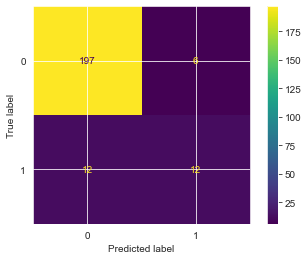

In [3]:
from util import print_evaluation
predictions = test_x.apply(contains_interpunct)
print_evaluation(predictions, test_y)

Check the misclassifications:

In [4]:
predictions = train_x.apply(contains_interpunct)

In [5]:
# False positives
train_x[~train_y & predictions][:5]

Test      
740   1854    De geheime relatie van Mike tijdens 'Blind Get...
531   1335    Kim Kardashian lijkt blij dat 'mei plasticvrij...
791   1975    Over en uit voor Luc Bomans: oudgediende en ic...
835   2088    Sfeer tussen kandidaten bereikt dieptepunt vla...
133   349     Trump trekt verklaringen terug in: "Ik was gew...
Name: Headline, dtype: object

In [6]:
# False negatives
train_x[train_y & ~predictions][:5]

Test      
755   1891    Reusachtig "monster" zaait paniek onder toeris...
665   1658    "Vermiste" man reageert via Facebook op opspor...
182   471     Zo duur zijn de outfits van meghan Markle (en ...
758   1900    Bent u er klaar voor? Dit is hem volgens u (en...
722   1799    Dagboek van Anne Frank geeft laatste geheimen ...
Name: Headline, dtype: object